# Feature Engineering

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [6]:
df = pd.read_csv('../data/raw/CarPrice_Assignment.csv')
df = df[['symboling', 'curbweight', 'horsepower', 'compressionratio', 'citympg', 'fueltype', 'carbody', 'drivewheel', 'price']]
df = pd.get_dummies(df, drop_first=True)
print(df.shape)
df.head()

(205, 13)


,symboling,curbweight,horsepower,compressionratio,citympg,price,fueltype_gas,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd
0,3,2548,111,9.0,21,13495.0,True,False,False,False,False,False,True
1,3,2548,111,9.0,21,16500.0,True,False,False,False,False,False,True
2,1,2823,154,9.0,19,16500.0,True,False,True,False,False,False,True
3,2,2337,102,10.0,24,13950.0,True,False,False,True,False,True,False
4,2,2824,115,8.0,18,17450.0,True,False,False,True,False,False,False


In [ ]:
#Outlier handle (log)
df_original = df.copy()
df['price'] = np.log1p(df['price'])

# Scale
scaler = StandardScaler()
num_cols = ['symboling', 'curbweight', 'horsepower', 'compressionratio', 'citympg']
df[num_cols] = scaler.fit_transform(df[num_cols])

Shape after selection and encoding: (205, 13)
   symboling  curbweight  horsepower  compressionratio  citympg    price  \
0          3        2548         111               9.0       21  13495.0   
1          3        2548         111               9.0       21  16500.0   
2          1        2823         154               9.0       19  16500.0   
3          2        2337         102              10.0       24  13950.0   
4          2        2824         115               8.0       18  17450.0   

   fueltype_gas  carbody_hardtop  carbody_hatchback  carbody_sedan  \
0          True            False              False          False   
1          True            False              False          False   
2          True            False               True          False   
3          True            False              False           True   
4          True            False              False           True   

   carbody_wagon  drivewheel_fwd  drivewheel_rwd  
0          False         

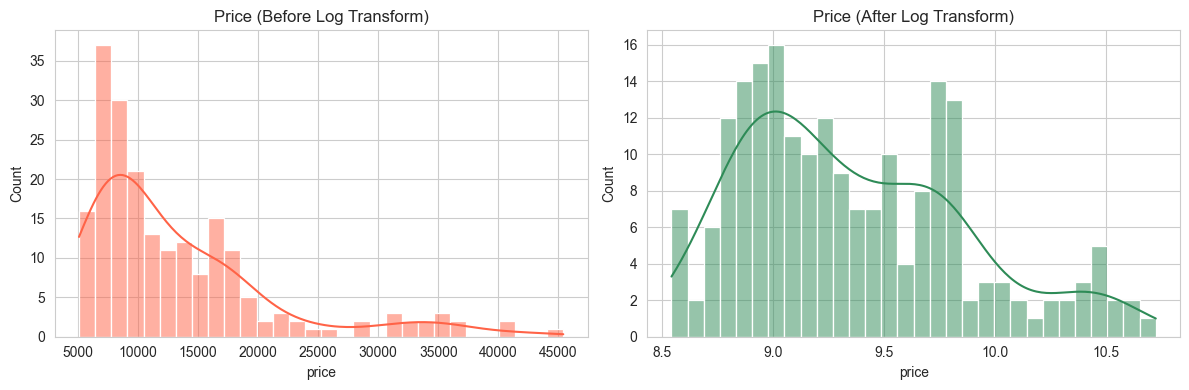

Before mean: 13276.710570731706
After mean: 9.354775918945913
Equal check: False


In [19]:
# === Imports ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# === Load and Select Features ===
df = pd.read_csv('../data/raw/CarPrice_Assignment.csv')
df = df[['symboling', 'curbweight', 'horsepower', 'compressionratio', 'citympg', 'fueltype', 'carbody', 'drivewheel', 'price']]
df = pd.get_dummies(df, drop_first=True)
print("Shape after selection and encoding:", df.shape)
print(df.head())

# === Outlier Handling and Scaling ===
# 1. Copy before log
df_original = df.copy()

# 2. Log transform price
df['price'] = np.log1p(df['price'])

# 3. Scale numerical features
scaler = StandardScaler()
num_cols = ['symboling', 'curbweight', 'horsepower', 'compressionratio', 'citympg']
df[num_cols] = scaler.fit_transform(df[num_cols])

# === Visualize ===
fig, axes = plt.subplots(1, 2, figsize=(12,4))

# Before
sns.histplot(df_original['price'], bins=30, ax=axes[0], kde=True, color='tomato')
axes[0].set_title('Price (Before Log Transform)')

# After
sns.histplot(df['price'], bins=30, ax=axes[1], kde=True, color='seagreen')
axes[1].set_title('Price (After Log Transform)')

plt.tight_layout()
plt.show()

# === Check ===
print("Before mean:", df_original['price'].mean())
print("After mean:", df['price'].mean())
print("Equal check:", df['price'].equals(df_original['price']))

In [20]:
df.to_csv('../data/processed/feature_engineered.csv', index=False)
print("✅ Processed data saved to data/processed/feature_engineered.csv")

✅ Processed data saved to data/processed/feature_engineered.csv
